In [28]:
import json
import os
import glob
import time
import random
import numpy as np
import pandas as pd
from numpy import reshape
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import savefig

from flask import Flask, request, render_template, redirect, abort, jsonify, send_from_directory, send_file, send_from_directory, url_for
from werkzeug.utils import secure_filename

import tensorflow as tf
#from tensorflow.keras import datasets, layers, models
import keras

from tensorflow.keras.models import Model, Sequential, model_from_json
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.callbacks import TensorBoard, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K

import cv2
from cv2 import resize
from skimage import color
from skimage.io import imsave
from skimage.transform import resize
from skimage.io import imsave, imread, imshow
from skimage.color import rgb2lab, lab2rgb, rgb2gray, gray2rgb

In [29]:
def load_model():
    # load json and create model
    json_file = open('model2.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights("model2.h5")
    return loaded_model

In [30]:
def load_image():
    color_me = []
    resized = []
    for filename in os.listdir('received\\'):
        color_me.append(img_to_array(load_img('received\\'+filename)))   
    for i in color_me:
        i = resize(i, (256, 256, 3), mode='constant')
        resized.append(i) 
    resized = np.array(resized, dtype=float)
    resized = rgb2lab(1.0/255*resized)[:,:,:,0]
    image = resized.reshape(resized.shape+(1,))

    return image

In [31]:
def colorize():
    loaded_model = load_model()
    image = load_image()
    output = loaded_model.predict(image)
    output = output * 128
    # Output colorizations
    for i in range(len(output)):
        result = np.zeros((256, 256, 3))
        result[:,:,0] = image[i][:,:,0]
        result[:,:,1:] = output[i]
        result = lab2rgb(result)
        result = resize(result, (1024, 1024, 3), mode='constant')
        #result = cv2.resize(result, (int(size), int(size2))
        imsave("transformed\\Quality_Model3"+str(i)+".jpg", (result))

In [32]:
colorize()

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


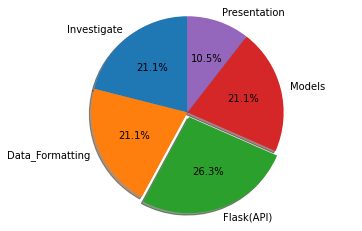

In [33]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Investigate', 'Data_Formatting', 'Flask(API)', 'Models', 'Presentation'
sizes = [20, 20, 25, 20, 10]
explode = (0, 0, 0.05, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
fig1.savefig('pie', dpi=150, )